In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

stars = pd.read_csv('Stars.csv')
stars.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [99]:
stars.rename(columns={'L': 'Luminosity', 'R': 'Radius', 'A_M': 'Absolute_Magnitude'}, inplace=True)
stars.tail()

,Temperature,Luminosity,Radius,Absolute_Magnitude,Color,Spectral_Class,Type
235,38940,374830.0,1356.0,-9.93,Blue,O,5
236,30839,834042.0,1194.0,-10.63,Blue,O,5
237,8829,537493.0,1423.0,-10.73,White,A,5
238,9235,404940.0,1112.0,-11.23,White,A,5
239,37882,294903.0,1783.0,-7.80,Blue,O,5


In [100]:
stars.dtypes

Temperature             int64
Luminosity            float64
Radius                float64
Absolute_Magnitude    float64
Color                  object
Spectral_Class         object
Type                    int64
dtype: object

In [101]:
stars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Temperature         240 non-null    int64  
 1   Luminosity          240 non-null    float64
 2   Radius              240 non-null    float64
 3   Absolute_Magnitude  240 non-null    float64
 4   Color               240 non-null    object 
 5   Spectral_Class      240 non-null    object 
 6   Type                240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 11.3+ KB


In [102]:
stars.describe()

,Temperature,Luminosity,Radius,Absolute_Magnitude,Type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [103]:
stars.isnull().any()

Temperature           False
Luminosity            False
Radius                False
Absolute_Magnitude    False
Color                 False
Spectral_Class        False
Type                  False
dtype: bool

In [104]:
stars.duplicated().sum()

0

In [105]:
stars['Type'].value_counts()

5    40
4    40
3    40
2    40
1    40
0    40
Name: Type, dtype: int64

In [106]:
stars['Spectral_Class'].value_counts(normalize=True)

M    0.462500
B    0.191667
O    0.166667
A    0.079167
F    0.070833
K    0.025000
G    0.004167
Name: Spectral_Class, dtype: float64

In [107]:
stars['Color'].value_counts()

Red                   112
Blue                   56
Blue-white             26
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
Whitish                 2
Orange                  2
yellowish               2
Orange-Red              1
Blue-White              1
Pale yellow orange      1
Yellowish               1
White-Yellow            1
Name: Color, dtype: int64

In [108]:
colors = {'blue': ['Blue', 'Blue-white', 'Blue White', 'Blue white', 'Blue-White'],
          'yellow': ['yellow-white', 'Yellowish White', 'yellowish', 'Yellowish'],
          'white': ['White', 'white', 'Whitish', 'White-Yellow'],
          'orange': ['Orange', 'Orange-Red', 'Pale yellow orange']}


def update_color(col:dict):
    for k, v in col.items():
        for i in v:
            stars.loc[stars['Color'] == i, 'Color'] = k.title()
    return stars['Color']


update_color(colors)

0        Red
1        Red
2        Red
3        Red
4        Red
       ...  
235     Blue
236     Blue
237    White
238    White
239     Blue
Name: Color, Length: 240, dtype: object

In [109]:
stars['Color'].value_counts()

Red       112
Blue       97
Yellow     14
White      13
Orange      4
Name: Color, dtype: int64

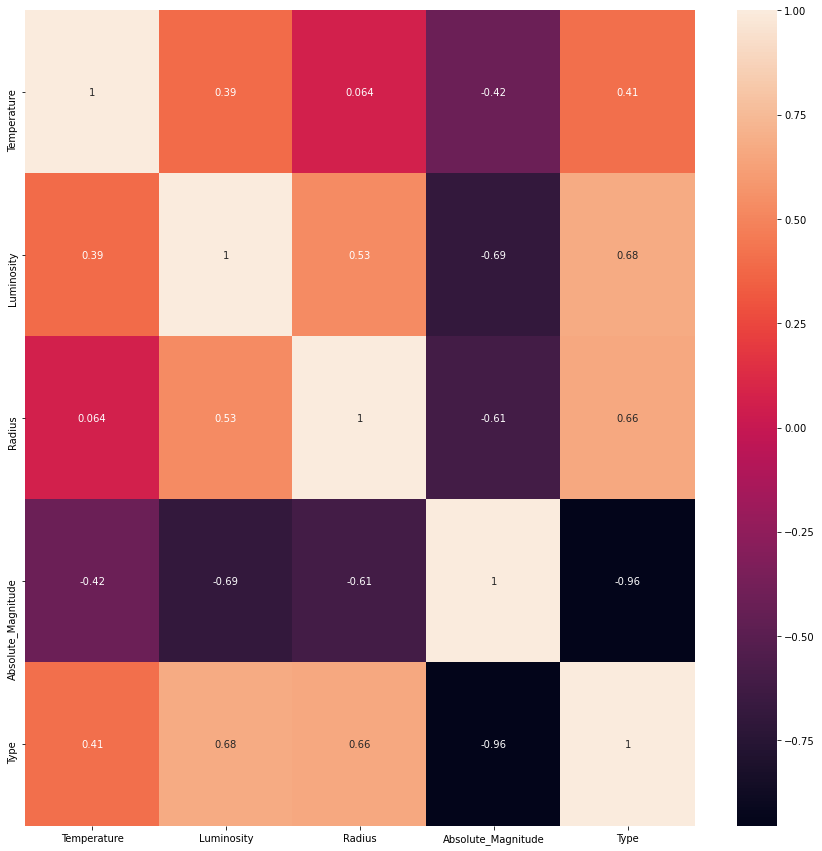

In [110]:
plt.figure(figsize=(15, 15))
sns.heatmap(stars.corr(), annot=True)

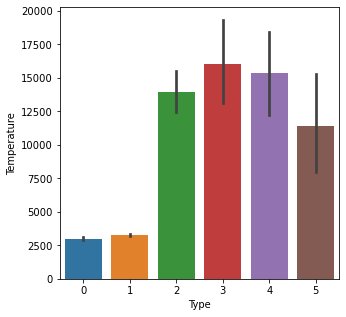

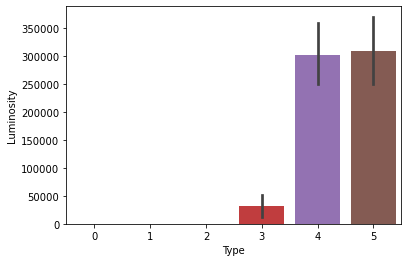

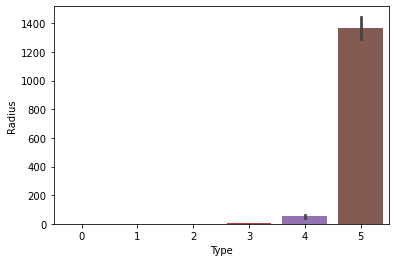

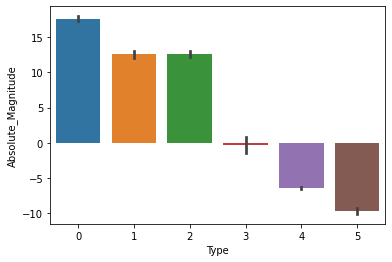

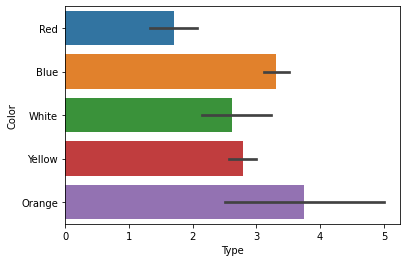

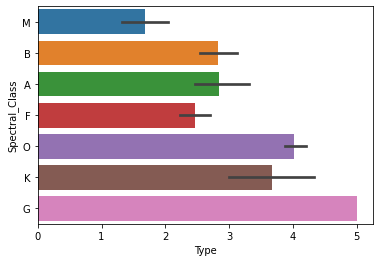

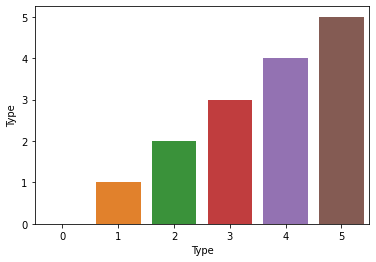

In [111]:
plt.figure(figsize=(5, 5))
for i in stars.columns:
    sns.barplot(x = 'Type', y = i, data = stars)
    plt.show()

In [112]:
stars['Color'].unique()

array(['Red', 'Blue', 'White', 'Yellow', 'Orange'], dtype=object)

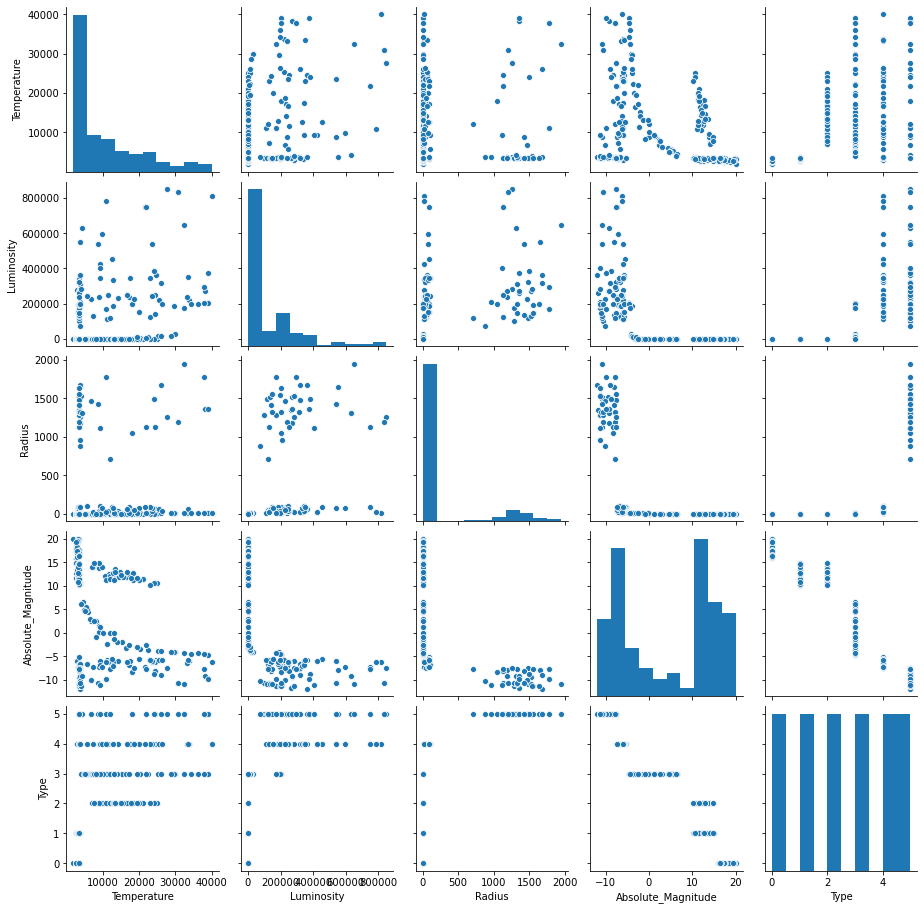

In [113]:
sns.pairplot(stars)

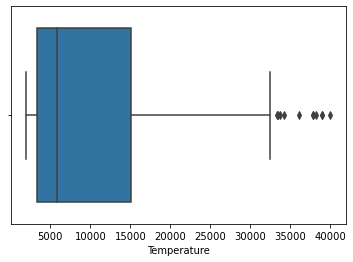

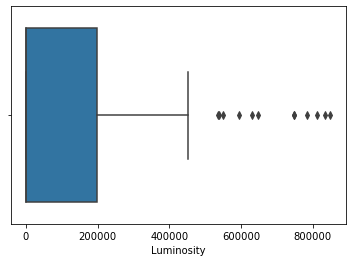

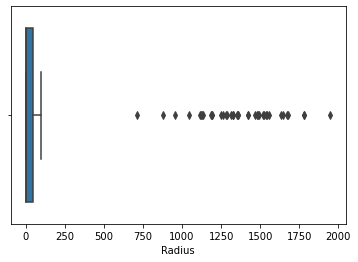

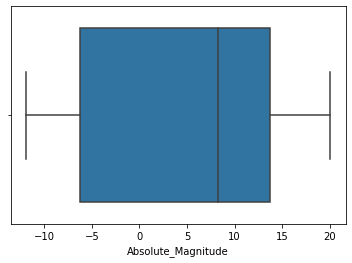

In [114]:
new = stars.drop(['Spectral_Class', 'Color', 'Type'], axis=1)

for i in new.columns:
    sns.boxplot(x = i, data = new)
    plt.show()

In [128]:
stars = pd.get_dummies(data=stars)

In [129]:
stars.tail()

,Temperature,Luminosity,Radius,Absolute_Magnitude,Type,Color_Orange,Color_Red,Color_White,Color_Yellow,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
235,38940,374830.0,1356.0,-9.93,5,0,0,0,0,0,0,0,0,0,1
236,30839,834042.0,1194.0,-10.63,5,0,0,0,0,0,0,0,0,0,1
237,8829,537493.0,1423.0,-10.73,5,0,0,1,0,0,0,0,0,0,0
238,9235,404940.0,1112.0,-11.23,5,0,0,1,0,0,0,0,0,0,0
239,37882,294903.0,1783.0,-7.80,5,0,0,0,0,0,0,0,0,0,1


In [130]:
X = stars.drop(['Type'], axis=1)
y = stars['Type']

In [133]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [138]:
scaler = RobustScaler()
scaler.fit(X_train)


RobustScaler()

In [139]:
X_tr_scaled = scaler.transform(X_train)

In [143]:
X_test_scaled = scaler.transform(X_test)

In [163]:
scores = []

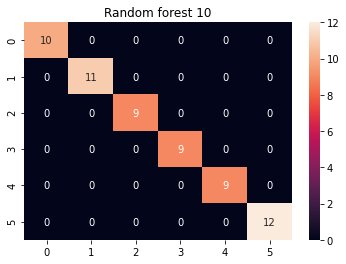

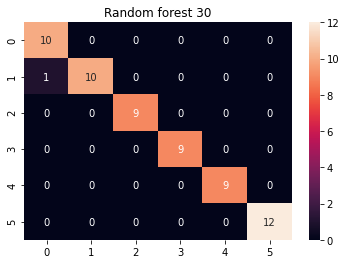

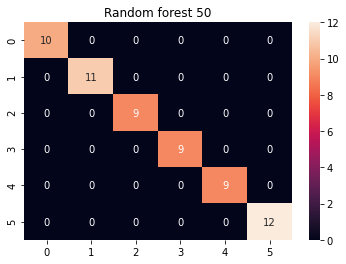

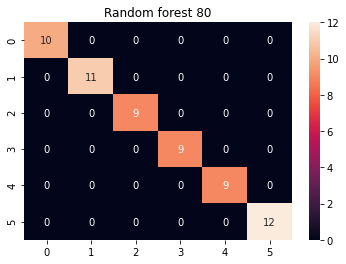

In [166]:
for i in [10, 30, 50, 80]:
    rf = RandomForestClassifier(n_estimators=i, random_state=0)
    rf.fit(X_tr_scaled, y_train)
    scores.append(cross_val_score(rf, X_test_scaled, y_test, cv=5).mean())
    plt.subplots()
    sns.heatmap(confusion_matrix(y_test, rf.predict(X_test_scaled)), annot=True)
    plt.title(f'Random forest {str(i)}')

In [167]:
scores

[0.9333333333333332, 0.9, 0.9, 0.9166666666666667]

In [150]:
cv_log_reg = RepeatedStratifiedKFold(random_state=0)

In [157]:
score_log_reg = []

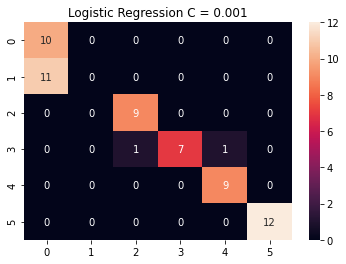

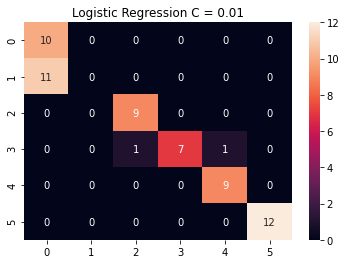

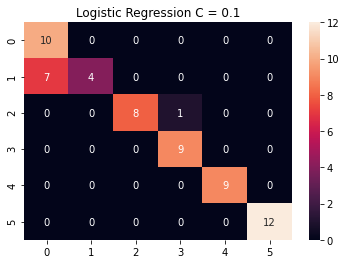

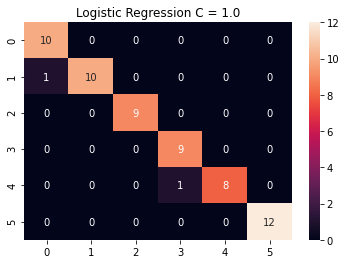

In [158]:
for p in [0.001, 0.01, 0.1, 1.0]:
    lr = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
    lr.fit(X_tr_scaled, y_train)
    score_log_reg.append(cross_val_score(lr, X_test_scaled, y_test, scoring='accuracy', cv=cv_log_reg).mean())
    plt.subplots()
    sns.heatmap(confusion_matrix(y_test, lr.predict(X_test_scaled)), annot=True)
    plt.title(f'Logistic Regression C = {p}')

In [159]:
score_log_reg

[0.3833333333333334, 0.495, 0.7250000000000001, 0.9016666666666667]